In [1]:
import pandas as pd

df = pd.read_csv('heart_failure_clinical_records.csv', delimiter=',', decimal='.')
df.columns = ['Age','Anaemia','CPK','Diabetes','Ejection Fraction','High Blood Pressure','Platelets','Serum Creatinine','Serum Sodium','Sex','Smoking','Time','Death Event']

#df.head()
df.head(10) # Primeras 10 filas de los datos médicos

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
5,70.0,0,232,1,30,0,302000.00,1.2,132,1,0,210,0
6,63.0,1,122,1,60,0,172000.00,1.2,145,0,0,147,0
7,70.0,1,171,0,50,1,358000.00,0.9,141,0,0,196,0
8,50.0,0,482,1,30,0,300000.00,0.9,132,1,0,109,0
9,53.0,1,446,0,45,1,274000.00,1.0,133,1,0,215,0


In [2]:
df.tail(10) # Ultimas 10 filas de los datos médicos

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
4990,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209,0
4991,53.0,1,582,0,45,0,305000.0,1.1,137,1,1,209,0
4992,65.0,1,335,0,35,1,235000.0,0.8,136,0,0,120,0
4993,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
4994,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
4995,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.0,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
4999,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174,0


In [3]:
df.describe() # Resumen estadistico

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [8]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Se seleccionan solo las columnas numéricas para el análisis de valores atípicos
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
'''
# Crear boxplots para cada variable numérica
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplots de Variables Numéricas')
plt.xticks(rotation=45)
plt.show()
'''
# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos utilizando el criterio del IQR
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Contar el número de valores atípicos por fila
num_outliers = outliers.sum()
print("Número de Filas con Valores Atípicos:", num_outliers)

Número de Filas con Valores Atípicos: 1172


In [9]:
# Calcular la mediana de cada columna numérica
medians = df[numeric_columns].median()

# Mostrar las medianas de las variables numéricas
print("\n\tMediana de Variables Numéricas:\n", medians)


	Mediana de Variables Numéricas:
 Age                        60.00
Anaemia                     0.00
CPK                       248.00
Diabetes                    0.00
Ejection Fraction          38.00
High Blood Pressure         0.00
Platelets              263358.03
Serum Creatinine            1.10
Serum Sodium              137.00
Sex                         1.00
Smoking                     0.00
Time                      113.00
Death Event                 0.00
dtype: float64


In [49]:
'''
# Seleccionar solo las columnas numéricas para el análisis de valores atípicos y normalización
num_columns_norm = ['Age','CPK','Ejection Fraction','Platelets','Serum Creatinine','Serum Sodium']

# Calcular la media y la desviación estándar de cada columna numérica seleccionada
means = df[num_columns_norm].mean()
stds = df[num_columns_norm].std()

# Normalizar las características numéricas utilizando Z-score normalization
df_normalized = df.copy()  # Crear una copia del DataFrame original

# Aplicar la normalización Z-score a cada columna numérica seleccionada
for col in num_columns_norm:
    df_normalized[col] = (df[col] - means[col]) / stds[col]

# Verificar los datos normalizados
print("Datos Normalizados:")
df_normalized.head(10)
'''

'\n# Seleccionar solo las columnas numéricas para el análisis de valores atípicos y normalización\nnum_columns_norm = [\'Age\',\'CPK\',\'Ejection Fraction\',\'Platelets\',\'Serum Creatinine\',\'Serum Sodium\']\n\n# Calcular la media y la desviación estándar de cada columna numérica seleccionada\nmeans = df[num_columns_norm].mean()\nstds = df[num_columns_norm].std()\n\n# Normalizar las características numéricas utilizando Z-score normalization\ndf_normalized = df.copy()  # Crear una copia del DataFrame original\n\n# Aplicar la normalización Z-score a cada columna numérica seleccionada\nfor col in num_columns_norm:\n    df_normalized[col] = (df[col] - means[col]) / stds[col]\n\n# Verificar los datos normalizados\nprint("Datos Normalizados:")\ndf_normalized.head(10)\n'

In [10]:
df_stats = df.describe().T
df_n = (df - df_stats['mean']) / df_stats['std']  # Para normalizar: (valor - promedio) / desv_estandar
df_n.describe()

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,-3.993250e-16,7.602807e-17,4.902745e-17,-2.700062e-17,-4.476419e-17,-4.263256e-18,-1.207923e-17,7.673862e-17,1.215028e-16,1.307399e-16,-9.094947e-17,6.536993e-17,4.973799e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.734489e+00,-9.499511e-01,-5.771895e-01,-8.852380e-01,-2.061216e+00,-7.577549e-01,-2.448735e+00,-8.607140e-01,-5.333097e+00,-1.349558e+00,-6.730344e-01,-1.638245e+00,-6.758588e-01
25%,-8.795865e-01,-9.499511e-01,-4.768551e-01,-8.852380e-01,-6.717063e-01,-7.577549e-01,-5.109748e-01,-4.645763e-01,-6.290439e-01,-1.349558e+00,-6.730344e-01,-7.329857e-01,-6.758588e-01
50%,-2.468414e-02,-9.499511e-01,-3.468300e-01,-8.852380e-01,2.304849e-02,-7.577549e-01,-1.752427e-02,-2.665075e-01,4.296368e-02,7.408353e-01,-6.730344e-01,-2.286271e-01,-6.758588e-01
75%,6.592377e-01,1.052475e+00,-4.873999e-03,1.129414e+00,6.309589e-01,1.319424e+00,4.584154e-01,3.059569e-02,7.149712e-01,7.408353e-01,1.485511e+00,9.094130e-01,1.479303e+00
max,2.967474e+00,1.052475e+00,7.447513e+00,1.129414e+00,3.670511e+00,1.319424e+00,5.968633e+00,7.953348e+00,2.506991e+00,7.408353e-01,1.485511e+00,1.995724e+00,1.479303e+00


In [11]:
df_n.corr()

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
Age,1.000000,0.123102,-0.064637,-0.099938,0.069380,0.092656,-0.024959,0.178194,-0.026182,0.072581,0.023534,-0.220182,0.249442
Anaemia,0.123102,1.000000,-0.181922,0.002214,0.023465,0.047172,-0.046343,0.032343,0.020723,-0.081526,-0.105996,-0.111049,0.054508
CPK,-0.064637,-0.181922,1.000000,-0.019987,-0.021007,-0.045821,0.024809,-0.004032,0.051404,0.069679,-0.014294,-0.013789,0.079706
Diabetes,-0.099938,0.002214,-0.019987,1.000000,-0.049101,-0.034712,0.072198,-0.019072,-0.107393,-0.153649,-0.167046,0.027454,-0.011273
Ejection Fraction,0.069380,0.023465,-0.021007,-0.049101,1.000000,0.021474,0.060289,-0.038473,0.212627,-0.112841,-0.021421,0.068472,-0.292702
High Blood Pressure,0.092656,0.047172,-0.045821,-0.034712,0.021474,1.000000,0.048044,-0.007362,0.065884,-0.089096,-0.025762,-0.183450,0.094023
Platelets,-0.024959,-0.046343,0.024809,0.072198,0.060289,0.048044,1.000000,-0.005178,0.041101,-0.095209,0.065018,-0.001025,-0.031521
Serum Creatinine,0.178194,0.032343,-0.004032,-0.019072,-0.038473,-0.007362,-0.005178,1.000000,-0.229683,0.042409,0.003029,-0.190489,0.311281
Serum Sodium,-0.026182,0.020723,0.051404,-0.107393,0.212627,0.065884,0.041101,-0.229683,1.000000,-0.053848,-0.013830,0.109712,-0.227355
Sex,0.072581,-0.081526,0.069679,-0.153649,-0.112841,-0.089096,-0.095209,0.042409,-0.053848,1.000000,0.434621,-0.008616,0.055604


[Text(0, 0, 'Age'),
 Text(0, 1, 'Anaemia'),
 Text(0, 2, 'CPK'),
 Text(0, 3, 'Diabetes'),
 Text(0, 4, 'Ejection Fraction'),
 Text(0, 5, 'High Blood Pressure'),
 Text(0, 6, 'Platelets'),
 Text(0, 7, 'Serum Creatinine'),
 Text(0, 8, 'Serum Sodium'),
 Text(0, 9, 'Sex'),
 Text(0, 10, 'Smoking'),
 Text(0, 11, 'Time'),
 Text(0, 12, 'Death Event')]

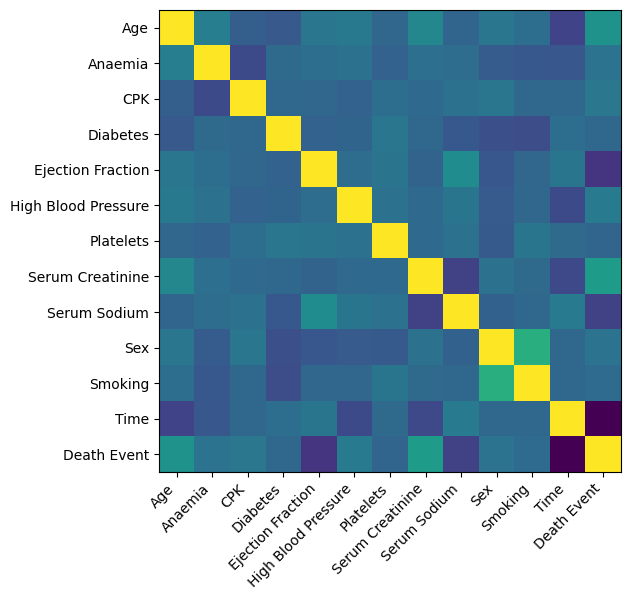

In [12]:
import matplotlib.pyplot as plt
labels = df_n.columns.to_list()
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow((df_n.corr().to_numpy()))
ax.set_xticks(np.arange(0, len(labels)))
ax.set_xticklabels(df_n.columns.to_list(), rotation=45, ha='right')
ax.set_yticks(np.arange(0, len(labels)))
ax.set_yticklabels(df_n.columns.to_list(), ha='right')

In [20]:
# Se consideran los datos que me interesan para la Fordward Propagation  

from sklearn.model_selection import train_test_split

features = ['Age','Anaemia','CPK','Diabetes','Ejection Fraction','High Blood Pressure','Serum Creatinine','Serum Sodium','Sex','Smoking']

X = df[features].values
Y = df['Death Event'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

# Número de registros de entrenamiento
n = X_train.shape[0]
print(n)
# Inicializar los pesos y sesgos de la red neuronal
w_hidden = np.random.rand(10, 10)
w_output = np.random.rand(1, 10)

b_hidden = np.random.rand(10, 1)
b_output = np.random.rand(1, 1)

# Funciones de activacion
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Funcion que corre la red neuronal con los datos de entrada para predecir la salida
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# Calculo de precisión
test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("ACCURACY: ", accuracy)


#El valor de precisión (accuracy) significa que aproximadamente el 31.67% de las predicciones 
# realizadas por tu red neuronal en el conjunto de prueba (X_test) fueron correctas. Es relativamente baja :(

3333
ACCURACY:  0.31193761247750207


In [21]:
# Se realiza el descenso de gradiente y calculo la red entrenada

L = 0.01  # La tasa de aprendizaje

# Devuelve pendientes para pesos y sesgos
# usando la regla de la cadena
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# Ejecutar descenso de gradiente
for i in range(100000):
    # seleccionar aleatoriamente un conjunto de datos de entrenamiento
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # pasar datos seleccionados aleatoriamente a través de la red neuronal
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # distribuir error a través de la retropropagación
    # y devolver pendientes para pesos y sesgos
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # actualizar pesos y sesgos
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2

# Cálculo de precisión
test_predictions = forward_prop(X_test.transpose())[3]  # Solo nos interesa la capa de salida, A2
test_predictions = (test_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios (0 o 1)
accuracy = np.mean(test_predictions == Y_test.reshape(-1, 1))  # Calcular la precisión comparando las predicciones con las etiquetas reales
print("ACCURACY: ", accuracy)

# El valor de precisión (accuracy) es  68.33% (mayor q el anterior) indica la proporción  de predicciones correctas realizadas 
# por la red neuronal en el conjunto de prueba (X_test) después de entrenarla mediante el descenso de gradiente.

ACCURACY:  0.6880623875224955
